In [1]:
!python -m pip install seaborn

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Read and Prepare Data

In [3]:
df = pd.read_csv("C:/Users/mekho/Documents/PycharmProjects/LinkedIn_Quiz/data/Food/wrangled_data.csv")

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,16,27,28,29,30,37,38,39,43,44,45,99,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(230875, 178)

In [5]:
df.head()

,Unnamed: 0,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,...,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
names = [str(n).split(',')[0].strip() for n in df.MMSANAME]

df['city'] = names

df = df.loc[df.city != 'nan', :].copy()

In [7]:
df.head()

,Unnamed: 0,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,...,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA,city
512,512,1200.0,2.017000e+09,,1,01,1,88.0,88.0,,...,9.0,9.0,9.0,,,,247.441661,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
513,513,1200.0,2.017000e+09,,1,02,1,88.0,88.0,,...,1.0,1.0,1.0,,,2,161.334971,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
514,514,1200.0,2.017000e+09,,1,01,4,88.0,30.0,30,...,1.0,1.0,1.0,,,1,756.699459,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
515,515,1200.0,2.017000e+09,,1,,2,88.0,5.0,02,...,2.0,1.0,1.0,,,1,1236.323980,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
516,516,1200.0,2.017000e+09,,1,,4,30.0,10.0,15,...,9.0,9.0,9.0,9,9,,213.968412,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy


In [8]:
df.columns

Index(['Unnamed: 0', 'DISPCODE', 'SEQNO', 'STATERE1', 'SAFETIME', 'HHADULT',
       'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       ...
       '_PASTAE1', '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3',
       '_MMSAWT', 'MMSANAME', '_MMSA', 'city'],
      dtype='object', length=179)

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,DISPCODE,SEQNO,STATERE1,SAFETIME,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,...,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MMSAWT,MMSANAME,_MMSA,city
512,1200.0,2.017000e+09,,1,01,1,88.0,88.0,,1.0,...,9.0,9.0,9.0,,,,247.441661,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
513,1200.0,2.017000e+09,,1,02,1,88.0,88.0,,1.0,...,1.0,1.0,1.0,,,2,161.334971,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
514,1200.0,2.017000e+09,,1,01,4,88.0,30.0,30,1.0,...,1.0,1.0,1.0,,,1,756.699459,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
515,1200.0,2.017000e+09,,1,,2,88.0,5.0,02,1.0,...,2.0,1.0,1.0,,,1,1236.323980,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy
516,1200.0,2.017000e+09,,1,,4,30.0,10.0,15,1.0,...,9.0,9.0,9.0,9,9,,213.968412,"Albany-Schenectady-Troy, NY, Metropolitan Stat...",10580.0,Albany-Schenectady-Troy


### Select Features

In [11]:
list_selected_features = ['city', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_',
                          'VEGEDA2_', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A', 
                          '_FRT16A', '_VEG23A'] #'FRUITE1', '_VEGETE1'

In [12]:
df = df.loc[:, list_selected_features].reindex()

In [13]:
df.head()

,city,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
512,Albany-Schenectady-Troy,,,,,,,,,9.0,9.0,1.0,1.0
513,Albany-Schenectady-Troy,0000,0300,0043,0010,0029,0200,000300,000282,1.0,1.0,1.0,1.0
514,Albany-Schenectady-Troy,0100,0057,0100,0000,0057,0100,000157,000257,1.0,1.0,1.0,1.0
515,Albany-Schenectady-Troy,0000,0100,0100,0014,0014,0100,000100,000228,1.0,1.0,1.0,1.0
516,Albany-Schenectady-Troy,0100,0300,0100,0014,0029,0100,000400,000243,1.0,1.0,1.0,1.0


In [14]:
# columns_to_select = [c for c in df.columns if c.startswith('_')]
# columns_to_select = ['city'] + columns_to_select
# df = df.loc[:, columns_to_select]

In [15]:
# df.head()

In [16]:
df.set_index('city', inplace=True)

In [17]:
df.head()

,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
city,,,,,,,,,,,,
Albany-Schenectady-Troy,,,,,,,,,9.0,9.0,1.0,1.0
Albany-Schenectady-Troy,0000,0300,0043,0010,0029,0200,000300,000282,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,0100,0057,0100,0000,0057,0100,000157,000257,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,0000,0100,0100,0014,0014,0100,000100,000228,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,0100,0300,0100,0014,0029,0100,000400,000243,1.0,1.0,1.0,1.0


## Exploration

In [18]:
dict_col_unique_counts = {}

In [19]:
for c in df.columns:
    print('')
    print(c)
    print(len(df[c].unique()))
    dict_col_unique_counts[c] = len(df[c].unique())
    


FTJUDA2_
87

FRUTDA2_
115

GRENDA1_
107

FRNCHDA_
82

POTADA1_
84

VEGEDA2_
109

_FRUTSU1
504

_VEGESU1
1357

_FRTLT1A
3

_VEGLT1A
3

_FRT16A
2

_VEG23A
2


In [20]:
dict_col_unique_counts

{'FTJUDA2_': 87,
 'FRUTDA2_': 115,
 'GRENDA1_': 107,
 'FRNCHDA_': 82,
 'POTADA1_': 84,
 'VEGEDA2_': 109,
 '_FRUTSU1': 504,
 '_VEGESU1': 1357,
 '_FRTLT1A': 3,
 '_VEGLT1A': 3,
 '_FRT16A': 2,
 '_VEG23A': 2}

In [21]:
df.FTJUDA2_.value_counts()

0000    89444
0100    31576
        17471
0014    13479
0029    12403
        ...  
0117        1
0250        1
0900        1
0233        1
1414        1
Name: FTJUDA2_, Length: 87, dtype: int64

In [22]:
# for i in df.FTJUDA2_:
#     try:
#         float(i)
#         print(i)
#     except:
#         print(i)

In [23]:
# sns.distplot(df['FTJUDA2_'].astype(float, error='coerce'))

## Data Transformation

### Fill Na

In [24]:
df = df.astype(str)

In [25]:
for col in df.columns:
    df[col] = df[col].str.strip()

In [26]:
np.where(df.applymap(lambda x: x == ''))

(array([     0,      0,      0, ..., 230347, 230347, 230347], dtype=int64),
 array([0, 1, 2, ..., 5, 6, 7], dtype=int64))

In [27]:
for col in df.columns:
    df[col] = df[col].replace("", "-1.0")
    df[col] = df[col].replace("nan", "-1.0")

In [28]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [29]:
df.head()

,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
city,,,,,,,,,,,,
Albany-Schenectady-Troy,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.0,9.0,1.0,1.0
Albany-Schenectady-Troy,0000,0300,0043,0010,0029,0200,000300,000282,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,0100,0057,0100,0000,0057,0100,000157,000257,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,0000,0100,0100,0014,0014,0100,000100,000228,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,0100,0300,0100,0014,0029,0100,000400,000243,1.0,1.0,1.0,1.0


In [30]:
df = df.fillna("-1.0")

In [31]:
df = df.astype(float)

In [32]:
df.head()

,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A
city,,,,,,,,,,,,
Albany-Schenectady-Troy,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.0,9.0,1.0,1.0
Albany-Schenectady-Troy,0.0,300.0,43.0,10.0,29.0,200.0,300.0,282.0,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,100.0,57.0,100.0,0.0,57.0,100.0,157.0,257.0,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,0.0,100.0,100.0,14.0,14.0,100.0,100.0,228.0,1.0,1.0,1.0,1.0
Albany-Schenectady-Troy,100.0,300.0,100.0,14.0,29.0,100.0,400.0,243.0,1.0,1.0,1.0,1.0


[None]

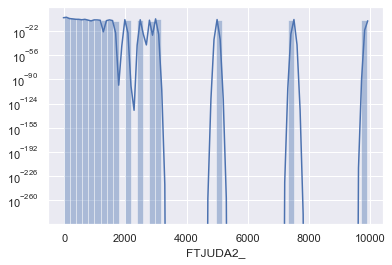

In [33]:
ax = sns.distplot(df['FTJUDA2_'])
ax.set(yscale="log")

In [34]:
# df = df.astype(str)

### Transformation

In [35]:
list_data_transformed = []

In [36]:
def transform_chunk(chunk):
    dict_temp_transformed_data = {}
#     print(np.unique(chunk.index)[0])
#     print(chunk.shape[0])
    dict_temp_transformed_data['city'] = np.unique(chunk.index)[0]
    for col in chunk.columns:
        print(col)
        if dict_col_unique_counts[col] < 30:
            print(col)
            for cat in list(np.unique(chunk[[col]])):
#                 print(np.unique(chunk[[col]]))
#                 print(cat)
                
                dict_temp_transformed_data[col + '_' + str(cat)] = sum((chunk[[col]].values == cat).squeeze()) / len(chunk)
#                 print(col + '_' + str(cat))
#                 print(dict_temp_transformed_data[col + '_' + str(cat)])
        else:
            dict_temp_transformed_data[col + '_mean'] = np.mean(chunk.loc[:, col].values)
            print(np.mean(chunk.loc[:, col].values))
            
    list_data_transformed.append(dict_temp_transformed_data)  
    return

In [37]:
sth = df.groupby('city').apply(lambda chunk: transform_chunk(chunk))

FTJUDA2_
32.278481012658226
FRUTDA2_
111.62183544303798
GRENDA1_
62.99208860759494
FRNCHDA_
15.875
POTADA1_
24.15348101265823
VEGEDA2_
84.20253164556962
_FRUTSU1
142.0237341772152
_VEGESU1
185.32911392405063
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
26.561668681983072
FRUTDA2_
103.12273276904475
GRENDA1_
56.084643288996375
FRNCHDA_
20.714631197097944
POTADA1_
18.01571946795647
VEGEDA2_
81.20677146311971
_FRUTSU1
128.9546553808948
_VEGESU1
173.50725513905684
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
34.01154734411085
FRUTDA2_
107.9284064665127
GRENDA1_
63.52309468822171
FRNCHDA_
15.021939953810623
POTADA1_
21.39838337182448
VEGEDA2_
89.72863741339492
_FRUTSU1
141.29907621247114
_VEGESU1
184.93995381062356
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
23.616132167152575
FRUTDA2_
107.8134110787172
GRENDA1_
58.06219630709427
FRNCHDA_
16.672497570456756
POTADA1_
21.011661807580175
VEGEDA2_
9

_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
28.936967632027258
FRUTDA2_
95.96081771720613
GRENDA1_
51.29301533219761
FRNCHDA_
20.57580919931857
POTADA1_
21.156729131175467
VEGEDA2_
86.29301533219761
_FRUTSU1
123.66098807495742
_VEGESU1
176.34071550255535
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
39.97442799461642
FRUTDA2_
120.25033647375504
GRENDA1_
73.0592193808883
FRNCHDA_
25.61372812920592
POTADA1_
22.46298788694482
VEGEDA2_
108.7550471063257
_FRUTSU1
158.8021534320323
_VEGESU1
218.00538358008075
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
22.971990592259996
FRUTDA2_
111.31409022877914
GRENDA1_
56.60594398118452
FRNCHDA_
16.65768655120804
POTADA1_
18.08189010049177
VEGEDA2_
87.879409878127
_FRUTSU1
132.61235834936926
_VEGESU1
174.23177250374172
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
26.922463768115943
FRUTDA2_
107.8159420289855
GRENDA1_
46.43115942028985
FRNCHDA_
17.58623188405797


_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
25.232311320754718
FRUTDA2_
111.55424528301887
GRENDA1_
53.637971698113205
FRNCHDA_
24.80188679245283
POTADA1_
26.27358490566038
VEGEDA2_
95.22405660377359
_FRUTSU1
135.26061320754718
_VEGESU1
193.35259433962264
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
33.11053180396246
FRUTDA2_
90.73722627737226
GRENDA1_
46.92283628779979
FRNCHDA_
21.072992700729927
POTADA1_
19.99687174139729
VEGEDA2_
83.08654848800835
_FRUTSU1
122.12825860271116
_VEGESU1
165.39520333680917
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
48.12224591329069
FRUTDA2_
149.05330490405117
GRENDA1_
84.41151385927505
FRNCHDA_
15.296375266524521
POTADA1_
23.916844349680172
VEGEDA2_
87.7867803837953
_FRUTSU1
184.08315565031984
_VEGESU1
204.67519545131486
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
30.009865470852017
FRUTDA2_
115.97309417040358
GRENDA1_
48.885201793721976
FRNCHDA_
17.68161434

_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
26.088022284122562
FRUTDA2_
124.11476323119777
GRENDA1_
56.90139275766017
FRNCHDA_
20.82618384401114
POTADA1_
20.716434540389972
VEGEDA2_
92.30417827298051
_FRUTSU1
148.65682451253483
_VEGESU1
185.93927576601672
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
29.06741573033708
FRUTDA2_
103.19101123595506
GRENDA1_
49.80149812734082
FRNCHDA_
19.884831460674157
POTADA1_
28.865168539325843
VEGEDA2_
85.3249063670412
_FRUTSU1
130.7181647940075
_VEGESU1
179.9185393258427
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
28.306528662420384
FRUTDA2_
117.11385350318471
GRENDA1_
66.28343949044586
FRNCHDA_
18.3343949044586
POTADA1_
19.36783439490446
VEGEDA2_
93.52388535031847
_FRUTSU1
144.5955414012739
_VEGESU1
194.72531847133757
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
28.716339869281047
FRUTDA2_
105.42483660130719
GRENDA1_
58.83660130718954
FRNCHDA_
19.328104575163

_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
25.80784410458806
FRUTDA2_
100.91243216576221
GRENDA1_
49.43043907252097
FRNCHDA_
22.565367538233843
POTADA1_
24.596941292550568
VEGEDA2_
84.13073507646769
_FRUTSU1
124.88258510113468
_VEGESU1
174.47705969412925
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
28.00581395348837
FRUTDA2_
86.89728682170542
GRENDA1_
46.424418604651166
FRNCHDA_
18.102713178294575
POTADA1_
21.598837209302324
VEGEDA2_
77.08527131782945
_FRUTSU1
113.74031007751938
_VEGESU1
157.4108527131783
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
31.96580483736447
FRUTDA2_
104.68432026688907
GRENDA1_
55.72935779816514
FRNCHDA_
16.422018348623855
POTADA1_
20.51834862385321
VEGEDA2_
90.87614678899082
_FRUTSU1
134.12427022518764
_VEGESU1
176.24854045037532
_FRTLT1A
_FRTLT1A
_VEGLT1A
_VEGLT1A
_FRT16A
_FRT16A
_VEG23A
_VEG23A
FTJUDA2_
36.785664578984
FRUTDA2_
107.30410577592205
GRENDA1_
56.47390396659708
FRNCHDA_
14.79888656924

In [38]:
df_transformed = pd.DataFrame(list_data_transformed)

In [39]:
df_transformed.head()

,city,FTJUDA2__mean,FRUTDA2__mean,GRENDA1__mean,FRNCHDA__mean,POTADA1__mean,VEGEDA2__mean,_FRUTSU1_mean,_VEGESU1_mean,_FRTLT1A_1.0,_FRTLT1A_2.0,_FRTLT1A_9.0,_VEGLT1A_1.0,_VEGLT1A_2.0,_VEGLT1A_9.0,_FRT16A_1.0,_VEG23A_0.0,_VEG23A_1.0,_FRT16A_0.0
0,Albany-Schenectady-Troy,32.278481,111.621835,62.992089,15.875000,24.153481,84.202532,142.023734,185.329114,0.639241,0.276899,0.083861,0.759494,0.142405,0.098101,1.000000,0.001582,0.998418,NaN
1,Albuquerque,26.561669,103.122733,56.084643,20.714631,18.015719,81.206771,128.954655,173.507255,0.588875,0.338573,0.072551,0.755139,0.158404,0.086457,1.000000,NaN,1.000000,NaN
2,Allentown-Bethlehem-Easton,34.011547,107.928406,63.523095,15.021940,21.398383,89.728637,141.299076,184.939954,0.654734,0.281755,0.063510,0.795612,0.124711,0.079677,1.000000,NaN,1.000000,NaN
3,Anchorage,23.616132,107.813411,58.062196,16.672498,21.011662,91.934888,130.093294,184.853256,0.592809,0.333333,0.073858,0.774538,0.133139,0.092323,1.000000,NaN,1.000000,NaN
4,Atlanta-Sandy Springs-Roswell,31.384171,103.698370,58.061141,18.852921,21.700747,89.085598,133.278872,180.922215,0.583560,0.317255,0.099185,0.727242,0.142663,0.130095,0.999321,0.001359,0.998641,0.000679


In [40]:
df_transformed.shape

(134, 19)

In [41]:
df_transformed.columns

Index(['city', 'FTJUDA2__mean', 'FRUTDA2__mean', 'GRENDA1__mean',
       'FRNCHDA__mean', 'POTADA1__mean', 'VEGEDA2__mean', '_FRUTSU1_mean',
       '_VEGESU1_mean', '_FRTLT1A_1.0', '_FRTLT1A_2.0', '_FRTLT1A_9.0',
       '_VEGLT1A_1.0', '_VEGLT1A_2.0', '_VEGLT1A_9.0', '_FRT16A_1.0',
       '_VEG23A_0.0', '_VEG23A_1.0', '_FRT16A_0.0'],
      dtype='object')

### Fill Na of df_transformed

In [42]:
df_transformed = df_transformed.fillna(df_transformed.median())

In [43]:
df_transformed.head()

,city,FTJUDA2__mean,FRUTDA2__mean,GRENDA1__mean,FRNCHDA__mean,POTADA1__mean,VEGEDA2__mean,_FRUTSU1_mean,_VEGESU1_mean,_FRTLT1A_1.0,_FRTLT1A_2.0,_FRTLT1A_9.0,_VEGLT1A_1.0,_VEGLT1A_2.0,_VEGLT1A_9.0,_FRT16A_1.0,_VEG23A_0.0,_VEG23A_1.0,_FRT16A_0.0
0,Albany-Schenectady-Troy,32.278481,111.621835,62.992089,15.875000,24.153481,84.202532,142.023734,185.329114,0.639241,0.276899,0.083861,0.759494,0.142405,0.098101,1.000000,0.001582,0.998418,0.001227
1,Albuquerque,26.561669,103.122733,56.084643,20.714631,18.015719,81.206771,128.954655,173.507255,0.588875,0.338573,0.072551,0.755139,0.158404,0.086457,1.000000,0.001623,1.000000,0.001227
2,Allentown-Bethlehem-Easton,34.011547,107.928406,63.523095,15.021940,21.398383,89.728637,141.299076,184.939954,0.654734,0.281755,0.063510,0.795612,0.124711,0.079677,1.000000,0.001623,1.000000,0.001227
3,Anchorage,23.616132,107.813411,58.062196,16.672498,21.011662,91.934888,130.093294,184.853256,0.592809,0.333333,0.073858,0.774538,0.133139,0.092323,1.000000,0.001623,1.000000,0.001227
4,Atlanta-Sandy Springs-Roswell,31.384171,103.698370,58.061141,18.852921,21.700747,89.085598,133.278872,180.922215,0.583560,0.317255,0.099185,0.727242,0.142663,0.130095,0.999321,0.001359,0.998641,0.000679


In [44]:
df_transformed = df_transformed.set_index('city')

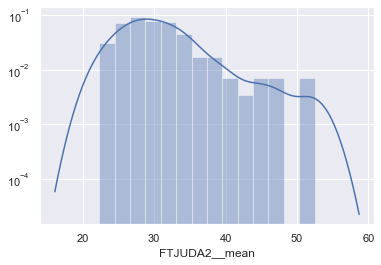

In [45]:
ax = sns.distplot(df_transformed['FTJUDA2__mean']);
ax.set(yscale="log");

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


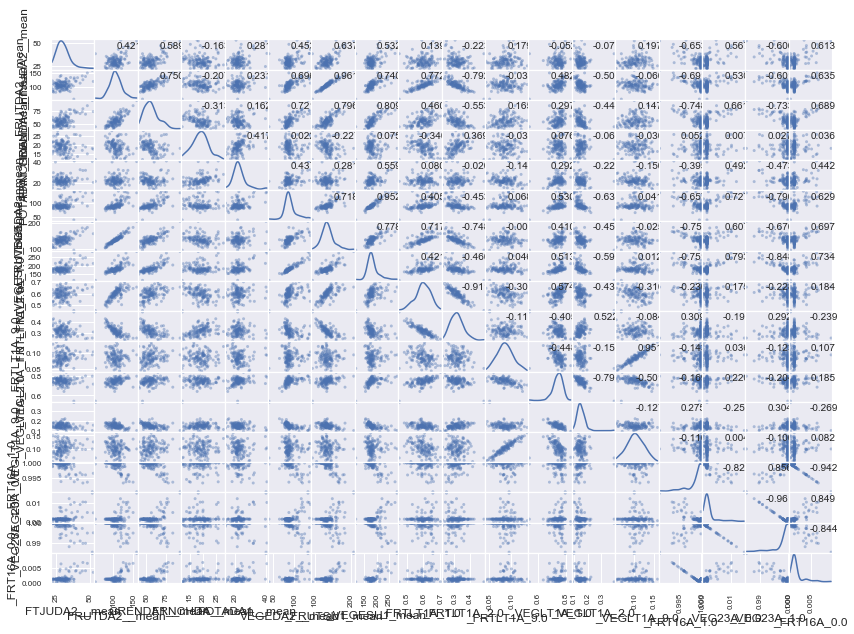

In [46]:
axes = pd.plotting.scatter_matrix(df_transformed, alpha = 0.4, figsize = (14,10), diagonal = 'kde');
corr = df_transformed.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center');

## Normalize Data

### Normalize via Box-Cox

In [47]:
df_transformed_normed = df_transformed.copy()

In [48]:
for col in df_transformed_normed.columns:
    df_transformed_normed[col] = list(stats.boxcox(df_transformed_normed[[col]])[0].squeeze())

In [49]:
df_transformed_normed.head()

,FTJUDA2__mean,FRUTDA2__mean,GRENDA1__mean,FRNCHDA__mean,POTADA1__mean,VEGEDA2__mean,_FRUTSU1_mean,_VEGESU1_mean,_FRTLT1A_1.0,_FRTLT1A_2.0,_FRTLT1A_9.0,_VEGLT1A_1.0,_VEGLT1A_2.0,_VEGLT1A_9.0,_FRT16A_1.0,_VEG23A_0.0,_VEG23A_1.0,_FRT16A_0.0
city,,,,,,,,,,,,,,,,,,
Albany-Schenectady-Troy,0.626553,24.630429,0.828429,9.654738,1.270486,5.659082,1.488629,0.910388,-0.252364,-1.913485,-1.192525,-0.131506,-5.271633,-0.940201,0.000000,-8.686814,-0.001057,-8.568302
Albuquerque,0.625641,23.451949,0.827561,12.152248,1.235806,5.601237,1.484538,0.910163,-0.272695,-1.511475,-1.217769,-0.132522,-4.691308,-0.953474,0.000000,-8.641573,0.000000,-8.568302
Allentown-Bethlehem-Easton,0.626754,24.123133,0.828487,9.197576,1.257021,5.761119,1.488418,0.910381,-0.245473,-1.876828,-1.238854,-0.121815,-6.076545,-0.961248,0.000000,-8.641573,0.000000,-8.568302
Anchorage,0.624937,24.107221,0.827833,10.077082,1.254892,5.800293,1.484921,0.910379,-0.271218,-1.540993,-1.214792,-0.127754,-5.667888,-0.946776,0.000000,-8.641573,0.000000,-8.568302
Atlanta-Sandy Springs-Roswell,0.626439,23.533032,0.827832,11.209161,1.258640,5.749539,1.485965,0.910308,-0.274662,-1.636352,-1.159968,-0.138343,-5.261299,-0.904149,-0.000531,-8.957713,-0.000957,-9.536516


In [50]:
df_transformed_normed.shape

(134, 18)

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


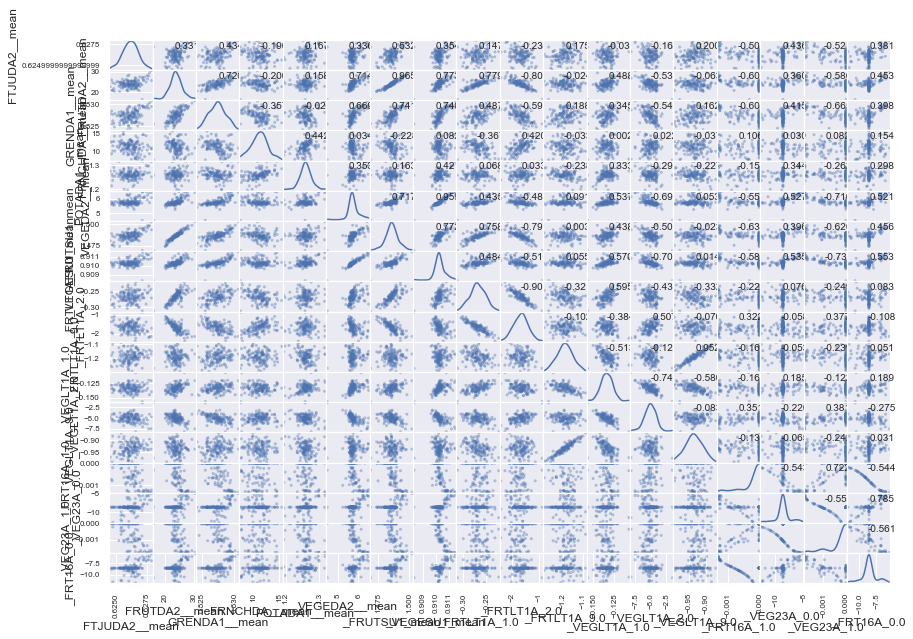

In [51]:
axes = pd.plotting.scatter_matrix(df_transformed_normed, alpha = 0.4, figsize = (14,10), diagonal = 'kde');
corr = df_transformed_normed.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center');

### Push Outliers

In [52]:
df_transformed_normed_pushed = df_transformed_normed.copy()

In [53]:
outliers  = []

for feature in df_transformed_normed.columns:
    
    Q1 = np.percentile(df_transformed_normed[feature], 25)
    
    Q3 = np.percentile(df_transformed_normed[feature], 75)
    
    step = 1.5*(Q3 - Q1)
    
    outliers_indices = df_transformed_normed.index[~((df_transformed_normed[feature] >= Q1 - step) 
                                                     & (df_transformed_normed[feature] <= Q3 + step))]
    
    if len(outliers_indices) > 0:

        good_indices = list(set(df_transformed_normed_pushed.index) - set(outliers_indices))

        df_transformed_normed_pushed.loc[outliers_indices, feature] = np.nanmedian(df_transformed_normed.loc[:, feature])


### Z-Score

In [54]:
from sklearn import preprocessing

In [55]:
df_transformed_normed_pushed_zscore = pd.DataFrame(preprocessing.scale(df_transformed_normed_pushed))

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [56]:
df_transformed_normed_pushed_zscore.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.534082,0.396927,0.810432,-1.010745,0.749097,-0.536612,0.583923,0.473993,0.956160,-1.019402,-0.092128,0.400910,-0.235835,-0.234434,0.796193,0.0,-0.895175,0.0
1,-0.816505,-0.289577,0.133341,0.609041,-1.778152,-0.960105,-0.494601,-0.460826,-0.254405,0.644003,-0.716327,0.237578,0.463889,-0.769889,0.796193,0.0,0.741457,0.0
2,0.830690,0.101410,0.855812,-1.307242,-0.232163,0.210418,0.528438,0.445211,1.366424,-0.867729,-1.237691,1.959299,-1.206352,-1.083484,0.796193,0.0,0.741457,0.0
3,-1.857813,0.092141,0.345308,-0.736830,-0.387301,0.497218,-0.393584,0.438781,-0.166452,0.521864,-0.642714,1.004289,-0.713617,-0.499698,0.796193,0.0,0.741457,0.0
4,0.364253,-0.242344,0.345200,-0.002608,-0.114155,0.125640,-0.118531,0.140471,-0.371549,0.127297,0.712886,-0.698446,-0.223375,1.219964,-0.321544,0.0,-0.740780,0.0


In [57]:
df_transformed_normed_zscore = pd.DataFrame(preprocessing.scale(df_transformed_normed))

## PCA

In [58]:
pca = PCA(n_components=6)

In [59]:
pca.fit(df_transformed_normed_pushed_zscore)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca_transformed_normed = pca.transform(df_transformed_normed_zscore)

In [61]:
df_pca_transformed_normed = pd.DataFrame(pca_transformed_normed)

In [62]:
df_pca_transformed_normed

,0,1,2,3,4,5
0,1.426261,0.241773,0.922841,-0.383695,-0.220251,0.753647
1,-1.476812,1.065904,0.644362,0.527613,0.741456,-0.197494
2,1.688225,2.069265,1.523164,0.718476,0.907856,1.287864
3,-0.364197,1.443907,0.675874,1.768183,0.010452,-0.306419
4,0.048248,-1.757459,-0.423283,-0.006678,-0.054863,0.153117
...,...,...,...,...,...,...
129,4.415944,-1.135028,-1.127850,0.539059,-0.222101,-1.052532
130,-1.796458,-0.877882,-0.936127,0.465348,-1.550147,0.209229
131,-3.956452,-0.910029,-0.222793,0.132378,0.428490,0.060980
132,0.102245,-1.574350,0.384108,-0.146688,0.245535,0.008444


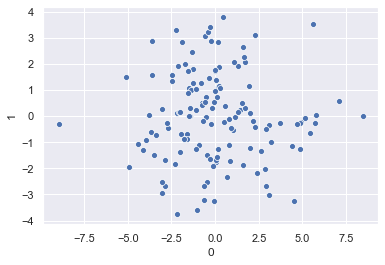

In [63]:
sns.scatterplot(x=0, y=1, data=df_pca_transformed_normed)

## Clustering

In [64]:
def Do_Clustering_KMeans(components=2, data=df_pca_transformed_normed):
    ##
    clusterer = KMeans(n_clusters=components, random_state=0).fit(data)

    preds = clusterer.predict(data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    
    return score, preds, centers




### Finding Best Number of Clusters

In [65]:
number_of_components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for n_components in number_of_components:
    score, _, _ = Do_Clustering_KMeans(components=n_components)
    print('With {} clusters, the silhouette coefficient is {:.3f}.'.format(n_components, score))

With 2 clusters, the silhouette coefficient is 0.286.
With 3 clusters, the silhouette coefficient is 0.241.
With 4 clusters, the silhouette coefficient is 0.221.
With 5 clusters, the silhouette coefficient is 0.211.
With 6 clusters, the silhouette coefficient is 0.205.
With 7 clusters, the silhouette coefficient is 0.199.
With 8 clusters, the silhouette coefficient is 0.200.
With 9 clusters, the silhouette coefficient is 0.207.
With 10 clusters, the silhouette coefficient is 0.187.
With 11 clusters, the silhouette coefficient is 0.193.
With 12 clusters, the silhouette coefficient is 0.183.
With 13 clusters, the silhouette coefficient is 0.201.
With 14 clusters, the silhouette coefficient is 0.190.


### Clusters

In [66]:
def cluster_results(reduced_data, preds, centers, first_axis=0, second_axis=1, 
                    pca_samples=None, axis_min=-8, axis_max=8):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (9,9))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = first_axis, y = second_axis, 
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    if pca_samples is not None:
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA Data - Centroids Marked by Number");
    plt.axis([axis_min, axis_max, axis_min, axis_max])

In [67]:
_, preds, centers = Do_Clustering_KMeans(components=2)

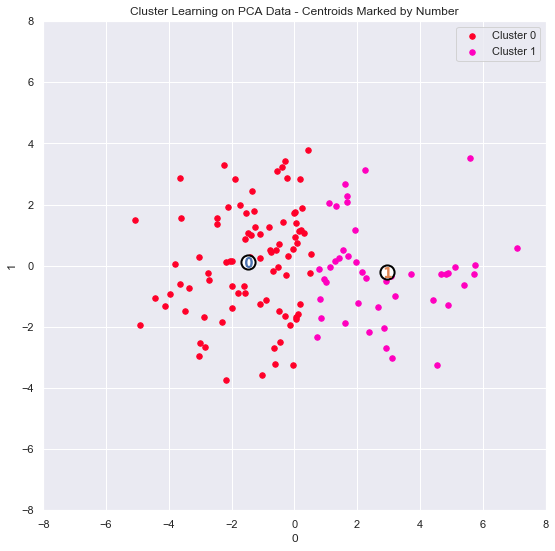

In [68]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=1)

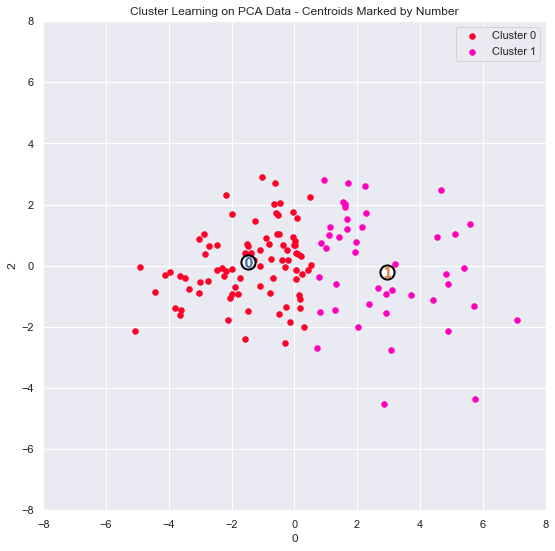

In [69]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=2)

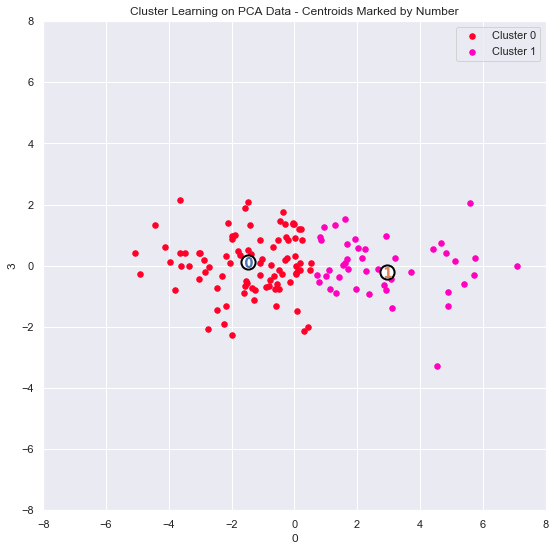

In [70]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=3)

In [71]:
df_transformed_normed.index[np.argmax(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


'Rockingham County-Strafford County'

In [72]:
df_transformed_normed.index[np.argmin(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


'San Juan-Carolina-Caguas'

## Principal Component Importance

In [73]:
dict_comp_feat = {}
for i, comp_original in enumerate(pca.components_):
    comp = np.abs(comp_original)
#     print(comp)
    out_arr = np.argsort(comp)
    out_arr = np.flip(out_arr)
    out_arr_first_ten = out_arr[0:20]
    dict_temp = {}
    dict_temp['importances'] = comp_original[out_arr_first_ten]
    dict_temp['features'] = df_transformed_normed.columns[out_arr_first_ten]
    dict_comp_feat[i] = dict_temp
    

In [74]:
def pca_importance(comp=None, dict_comp_feat=None, pca=None):

    ratios = pca.explained_variance_ratio_ #.reshape(len(pca.components_), 1)

    plt.figure(figsize=(14,8));
    
    components = dict_comp_feat[comp]
    components = pd.DataFrame(components)

    # Plot the feature weights as a function of the components
    explained_variance_ratio = pca.explained_variance_ratio_[comp]
    g = sns.barplot(x="features", y="importances", data=components)
    g.set_title("component {}, explained_variance_ratio is {:.2f}".format(comp, explained_variance_ratio))
    
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

    return

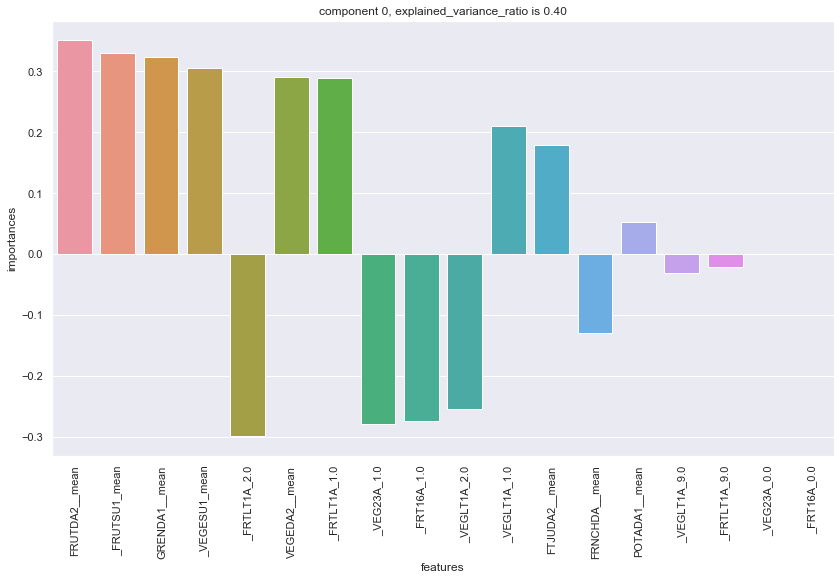

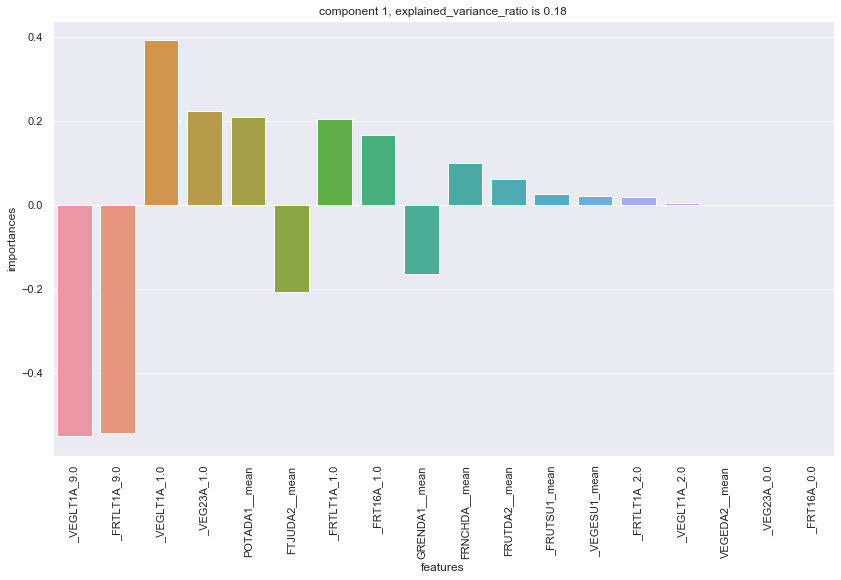

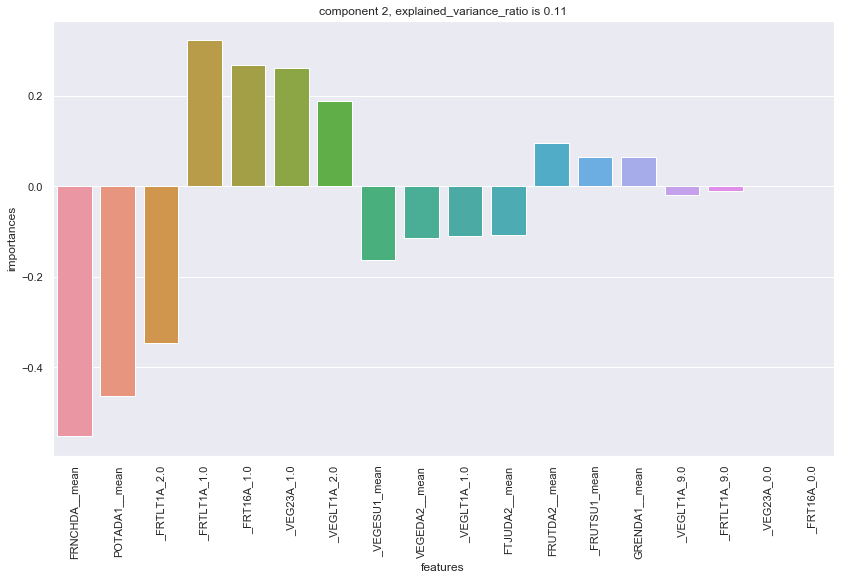

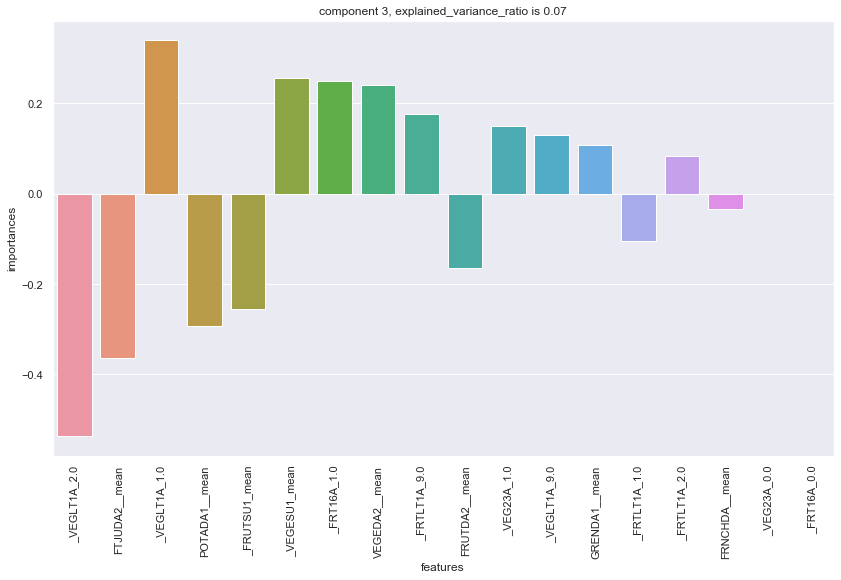

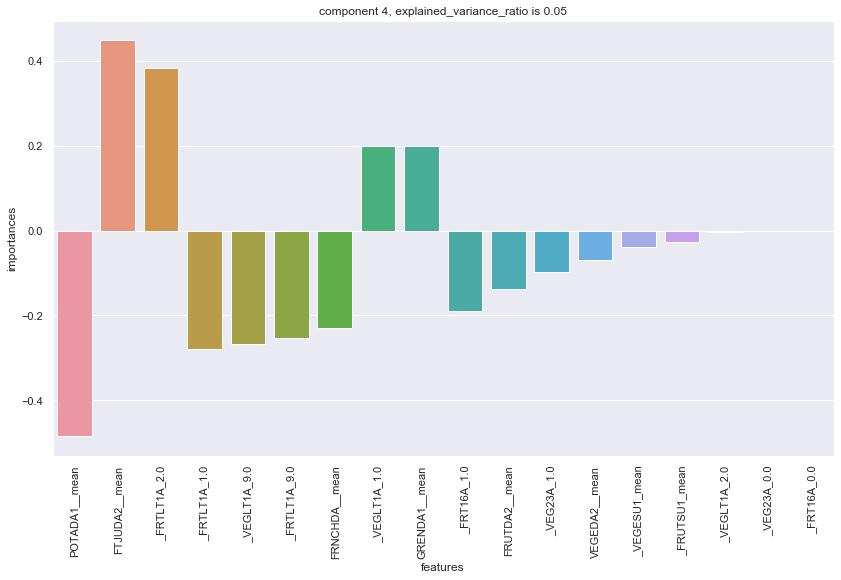

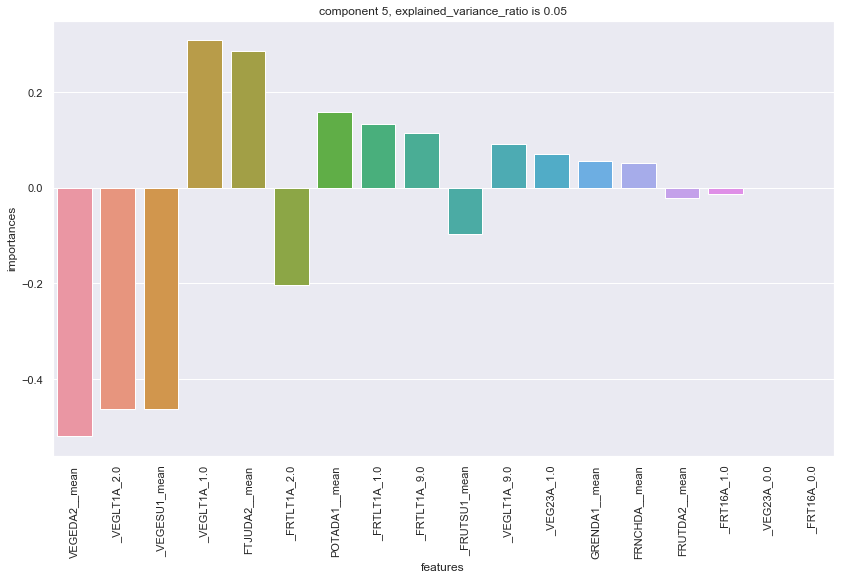

In [75]:
for comp in range(len(pca.components_)):
    pca_importance(comp=comp, dict_comp_feat=dict_comp_feat, pca=pca)